In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
#pip install -U scikit-learn


In [3]:
data=pd.read_csv('chatgpt_paraphrases.csv')
data.head()

,text,paraphrases,category,source
0,What is the step by step guide to invest in sh...,['Can you provide a detailed procedure for inv...,question,quora
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,['Can you tell me about the history of the Koh...,question,quora
2,How can I increase the speed of my internet co...,['What are some ways to enhance my internet sp...,question,quora
3,Why am I mentally very lonely? How can I solve...,['What is causing my mental loneliness and how...,question,quora
4,"Which one dissolve in water quikly sugar, salt...","['Among sugar, salt, methane, and carbon dioxi...",question,quora


In [5]:
category={}
for i in range(len(data)):
    ai=data.iloc[i]["paraphrases"][1:-1].split(', ')
    for j in ai[:1]:
        category[j[1:-1]]='ai'
    category[data.iloc[i]['text']]="human"

In [6]:
data=pd.DataFrame(category.items(),columns=["text","category"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808028 entries, 0 to 808027
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   text      808028 non-null  object
 1   category  808028 non-null  object
dtypes: object(2)
memory usage: 12.3+ MB


In [7]:
data=data.sample(frac=1)
data=data[:20000]
data

,text,category
453413,What is the reason for our eyes to blink?,ai
166798,Why do I always hurt people Anytime im around ...,human
233365,What would happen if unblurred backups Google ...,human
742262,Honour: Mr Crosby had originally been given a ...,human
741357,Angelica Castill,ai
...,...,...
111637,How do I stop my Chihuahua from biting my shoes?,human
401154,Can you tell me the likelihood of surviving st...,ai
273865,When is the ideal time to visit Goa?,ai
716572,Krenski was seen overtaking cars at high spee,ai


In [8]:
data["category"].value_counts()

category
human    10309
ai        9691
Name: count, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X=data['text']
y=data['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [11]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier

In [12]:
lg = LogisticRegression(penalty='l1',solver='liblinear')
sv = SVC(kernel='sigmoid',gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bg = BaggingClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [13]:
from sklearn import metrics

In [14]:
def score_prediction(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pr = model.predict(X_test)
    acc_score = metrics.accuracy_score(y_test,pr)
    pre_score = metrics.precision_score(y_test,pr,average="binary", pos_label="ai")
    recall= metrics.recall_score(y_test,pr,average="binary", pos_label="ai")
    f1= metrics.f1_score(y_test,pr,average="binary", pos_label="ai")
    mcc= metrics.matthews_corrcoef(y_test,pr)
    return acc_score,pre_score,recall,f1,mcc

In [15]:
acc_score = {}
pre_score = {}
recall_score={}
f1_score={}
mcc_score={}
clfs= {
    'LR':lg,
    'SVM':sv,
    'KNN':knn,
    'RFC':rfc,
    'ETC':etc,
    'ABC':abc,
    'BG':bg,
    'GBC':gbc,

}

In [16]:
for name,clf in clfs.items():
    acc_score[name],pre_score[name],recall_score[name],f1_score[name],mcc_score[name] = score_prediction(clf,X_train_tfidf,X_test_tfidf,y_train,y_test)

In [17]:
acc_score

{'LR': 0.7605,
 'SVM': 0.7725,
 'KNN': 0.668,
 'RFC': 0.77525,
 'ETC': 0.791,
 'ABC': 0.71175,
 'BG': 0.74975,
 'GBC': 0.703}

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

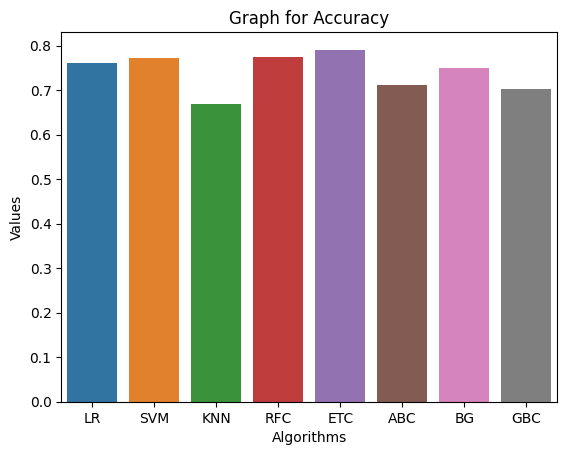

In [21]:
keys = list(acc_score.keys())
values = list(acc_score.values())

num_bars = len(keys)
# Create a bar plot using Seaborn with different colors for each bar
sns.barplot(x=keys, y=values,hue=keys,legend=False)
plt.xlabel('Algorithms')
plt.ylabel('Values')
plt.title('Graph for Accuracy')

# Show the plot
plt.show()


In [22]:
pre_score

{'LR': 0.76,
 'SVM': 0.7800320341697811,
 'KNN': 0.666490765171504,
 'RFC': 0.75,
 'ETC': 0.7800498753117207,
 'ABC': 0.6906338694418165,
 'BG': 0.7257304429783223,
 'GBC': 0.6690048224462954}

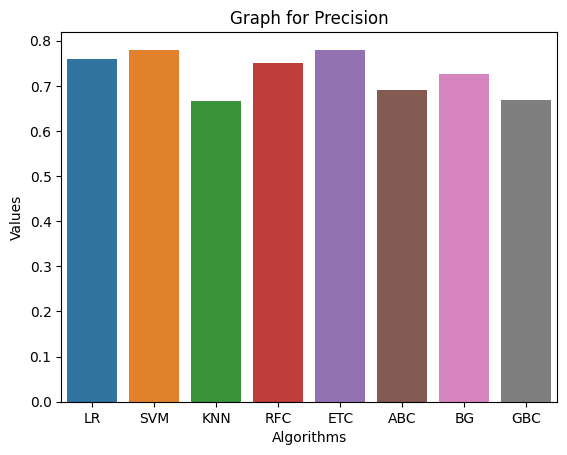

In [23]:
keys = list(pre_score.keys())
values = list(pre_score.values())

num_bars = len(keys)
# Create a bar plot using Seaborn with different colors for each bar
sns.barplot(x=keys, y=values,hue=keys,legend=False)
plt.xlabel('Algorithms')
plt.ylabel('Values')
plt.title('Graph for Precision')

# Show the plot
plt.show()

In [24]:
recall_score

{'LR': 0.746809596733027,
 'SVM': 0.7457886676875957,
 'KNN': 0.6447166921898928,
 'RFC': 0.8116385911179173,
 'ETC': 0.7983665135273098,
 'ABC': 0.74527820316488,
 'BG': 0.7861153649821337,
 'GBC': 0.7789688616641144}

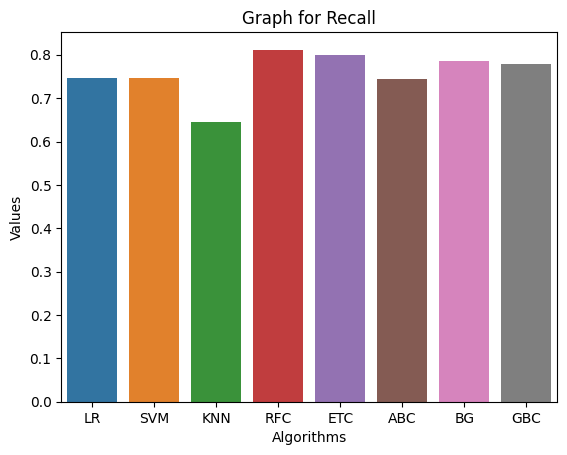

In [26]:
keys = list(recall_score.keys())
values = list(recall_score.values())

num_bars = len(keys)
# Create a bar plot using Seaborn with different colors for each bar
sns.barplot(x=keys, y=values,hue=keys,legend=False)
plt.xlabel('Algorithms')
plt.ylabel('Values')
plt.title('Graph for Recall')

# Show the plot
plt.show()

In [27]:
f1_score

{'LR': 0.7533470648815654,
 'SVM': 0.7625260960334029,
 'KNN': 0.6554229372080955,
 'RFC': 0.7796028438342731,
 'ETC': 0.7891019172552975,
 'ABC': 0.7169162779278173,
 'BG': 0.7547169811320755,
 'GBC': 0.719811320754717}

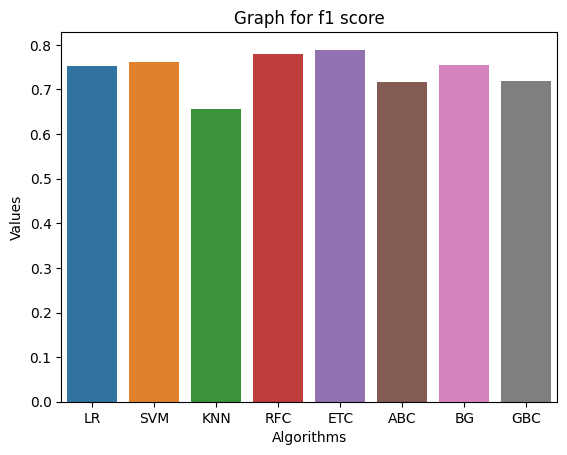

In [28]:
keys = list(f1_score.keys())
values = list(f1_score.values())

num_bars = len(keys)
# Create a bar plot using Seaborn with different colors for each bar
sns.barplot(x=keys, y=values,hue=keys,legend=False)
plt.xlabel('Algorithms')
plt.ylabel('Values')
plt.title('Graph for f1 score')

# Show the plot
plt.show()

In [29]:
mcc_score

{'LR': 0.5207068488662124,
 'SVM': 0.5449122515361974,
 'KNN': 0.3354567683955699,
 'RFC': 0.5528419816060773,
 'ETC': 0.5821754113819548,
 'ABC': 0.425449466556554,
 'BG': 0.501790204132277,
 'GBC': 0.4130635027223545}

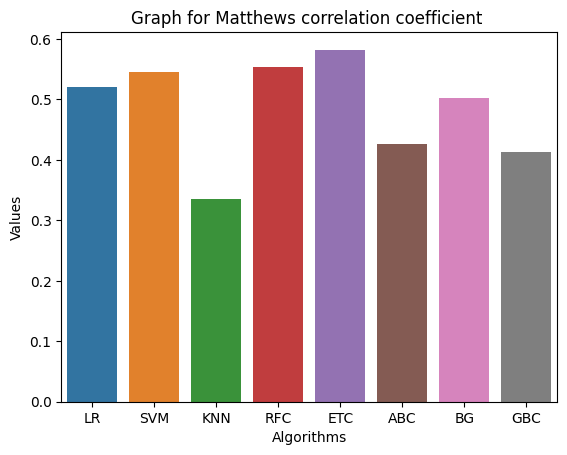

In [30]:
keys = list(mcc_score.keys())
values = list(mcc_score.values())

num_bars = len(keys)
# Create a bar plot using Seaborn with different colors for each bar
sns.barplot(x=keys, y=values,hue=keys,legend=False)
plt.xlabel('Algorithms')
plt.ylabel('Values')
plt.title('Graph for Matthews correlation coefficient ')

# Show the plot
plt.show()

In [31]:
etc.fit(X_train_tfidf,y_train)

ExtraTreesClassifier(n_estimators=50, random_state=2)

In [32]:
from sklearn.metrics import confusion_matrix
y_pred =etc.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1564  395]
 [ 441 1600]]


In [33]:
y_test.value_counts()

category
human    2041
ai       1959
Name: count, dtype: int64

<Axes: >

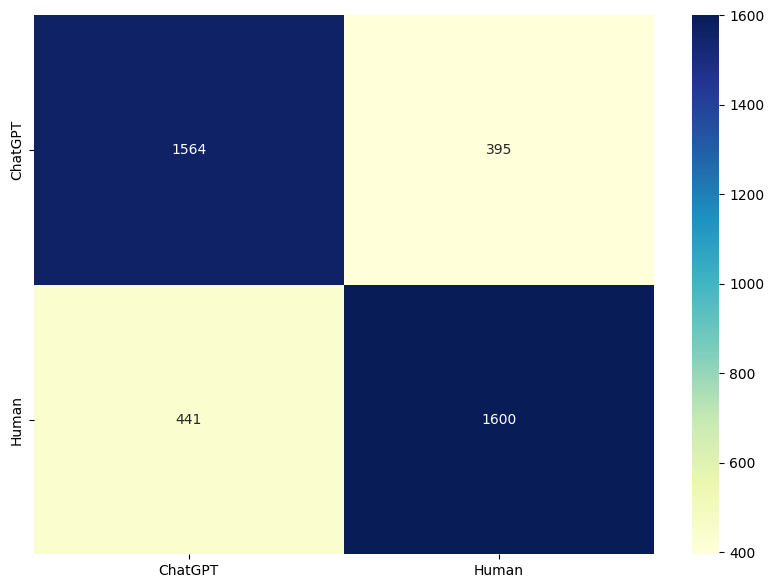

In [34]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm, index = [i for i in ["ChatGPT","Human"]],
                  columns = [i for i in ["ChatGPT","Human"]])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="YlGnBu", fmt='g')

In [35]:
from sklearn.metrics import roc_curve,auc
y_prob = etc.predict_proba(X_test_tfidf)[:, 1]

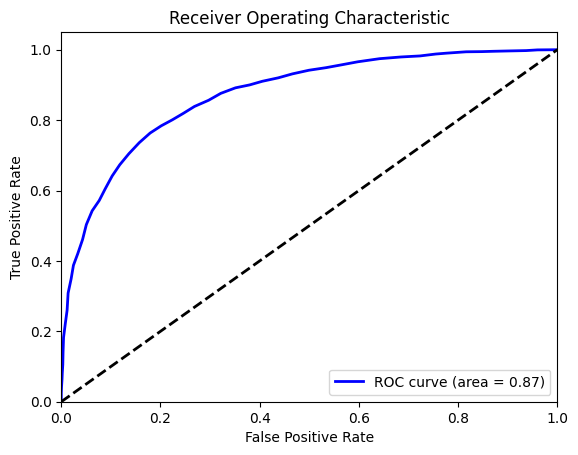

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='human')

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [37]:
def predict_text_category(model, text):
    text_vectorized = vectorizer.transform([text])
    
    prediction_prob = model.predict_proba(text_vectorized)
    
    predicted_class_idx = np.argmax(prediction_prob)
    
    unique_class_labels = np.unique(y_train)
    
    predicted_category = unique_class_labels[predicted_class_idx]
    
    return predicted_category

In [39]:
text_to_predict = 'Machine learning is a technique that automates things for machines, enabling them to learn without assistance.'
predicted_category = predict_text_category(etc, text_to_predict)
print("Predicted Category:", predicted_category)

Predicted Category: human


In [40]:
text_to_predict = "Creating a text classifier involves using a machine learning model, and for this purpose, I'll provide a simple example using Python and the scikit-learn library. This example won't specifically distinguish between human and AI-generated text, as it would require a more complex model and potentially a larger dataset for training. However, this example demonstrates the basics of a text classifier."
predicted_category = predict_text_category(etc, text_to_predict)
print("Predicted Category:", predicted_category)

Predicted Category: human


In [41]:
text_to_predict =  'What is the ideal waiting time to see a physician?'
predicted_category = predict_text_category(etc, text_to_predict)
print("Predicted Category:", predicted_category)

Predicted Category: ai


In [42]:
text_to_predict =  'Certainly! Here are some basic notes on a Reduced Instruction Set Computing (RISC) Instruction Set Architecture (ISA):'
predicted_category = predict_text_category(etc, text_to_predict)
print("Predicted Category:", predicted_category)

Predicted Category: human


In [43]:
text_to_predict =  'There are no arrest records for Patterson in the past.'
predicted_category = predict_text_category(etc, text_to_predict)
print("Predicted Category:", predicted_category)

Predicted Category: human
